# Decision Tree Classification

Following the CART meaning (regression and classification decision trees), decision trees classification will work the same way as regression by splitting the dataset in order to get our final splits (terminal leaves) for points.

<img src="img/intuition.png" width="600" height="400">

Let's build our decision tree.

Split1 : is X2 > 60 ?

<img src="img/split1_chart.png" width="600" height="400">

<img src="img/split1_tree.png" width="600" height="400">

Split 2: X2 > 60 & X1 < 50 ?

<img src="img/split2_chart.png" width="600" height="400">

<img src="img/split2_tree.png" width="600" height="400">

This split can already tell us if somethig is green or red.

Split 3 : X2 < 60 & X1 > 70 ?

<img src="img/split3_chart.png" width="600" height="400">

<img src="img/split3_tree.png" width="600" height="400">

Split 4: X2 < 60 & X1 < 70 & X2 < 20

<img src="img/split4_chart.png" width="600" height="400">

<img src="img/split4_tree.png" width="600" height="400">


Now with our terminal leaves we can classify correctly our red and green datapoints.

Decision trees it's an old method which is replaced by some other methods (Random Forest, Gradient Boosting) using kind of the same principle.

Now let's start our quick example.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Fitting classifier to the Training set 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Comparing Predictions with Test set
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
l = []
for index, row in results.iterrows():
    if row['y_test'] == row['y_pred']:
        result = 'Yes'
    else:
        result = 'No'
    l.append(result)
results['is ok ?'] = l

print(results)

    y_test  y_pred is ok ?
0        0       0     Yes
1        0       0     Yes
2        0       0     Yes
3        0       0     Yes
4        0       0     Yes
5        0       0     Yes
6        0       0     Yes
7        1       1     Yes
8        0       0     Yes
9        0       0     Yes
10       0       0     Yes
11       0       0     Yes
12       0       0     Yes
13       0       1      No
14       0       0     Yes
15       0       1      No
16       0       1      No
17       0       0     Yes
18       1       1     Yes
19       0       0     Yes
20       0       0     Yes
21       1       1     Yes
22       0       0     Yes
23       1       1     Yes
24       0       0     Yes
25       1       0      No
26       0       0     Yes
27       0       0     Yes
28       0       0     Yes
29       0       0     Yes
..     ...     ...     ...
70       1       1     Yes
71       0       0     Yes
72       0       0     Yes
73       1       1     Yes
74       0       0     Yes
7

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


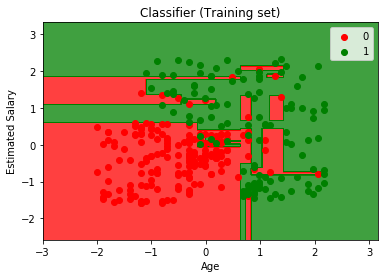

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


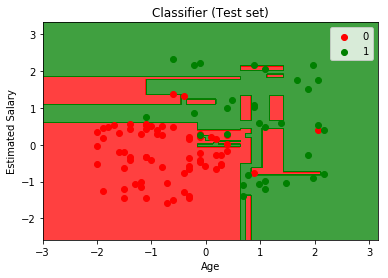

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()